In [45]:
#pip install -U seaborn

In [2]:
### 0.13.2

In [3]:
# pip3 install seaborn   

In [4]:
# py -m pip install seaborn 

# Overview

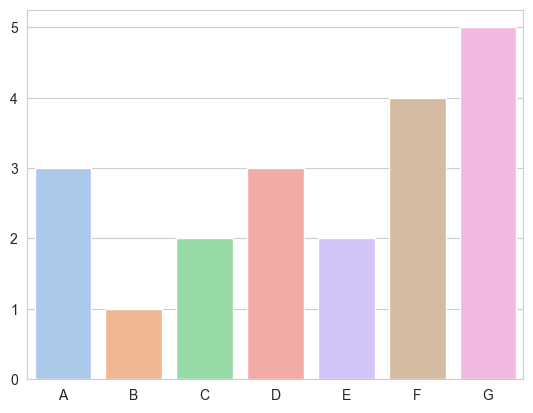

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid") #設定風格
category=["A","B","C","D","E","F","G"] 
data = [3,1,2,3,2,4,5]
sns.barplot(x= category, y= data, palette="pastel", hue=category) # palette ： color, #hue : bar 唔同color
plt.show()

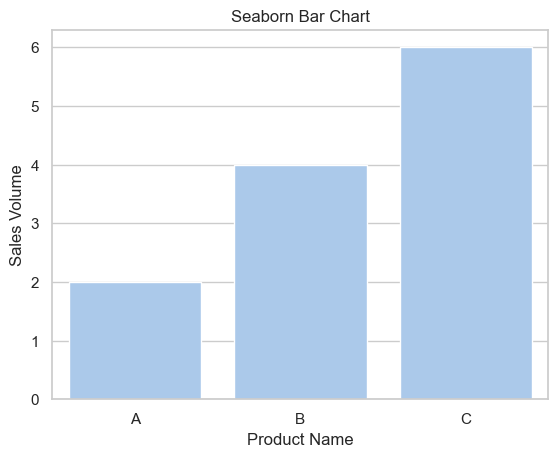

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette = 'pastel')
product = ['A','B','C']
sales = [2,4,6]
sns.barplot(x= product, y=sales)
plt.title('Seaborn Bar Chart')
plt.xlabel('Product Name')
plt.ylabel('Sales Volume')
plt.show()

In [1]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [2]:
type(penguins)

pandas.core.frame.DataFrame

# 1) sns.histplot

In [5]:
sns.__version__

'0.13.2'

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

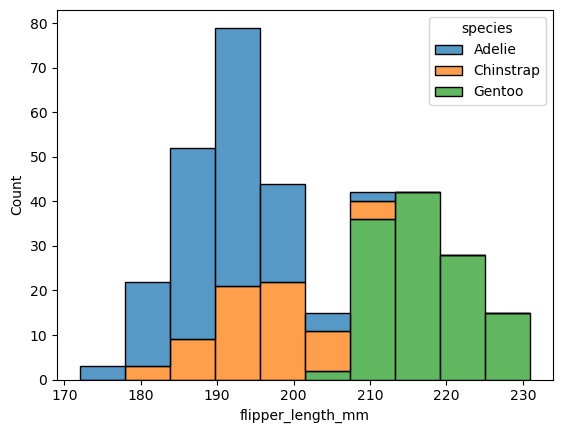

In [11]:
sns.histplot(data=penguins, x="flipper_length_mm", 
             hue="species", multiple="stack")
# multiple{“layer”, “dodge”, “stack”, “fill”}

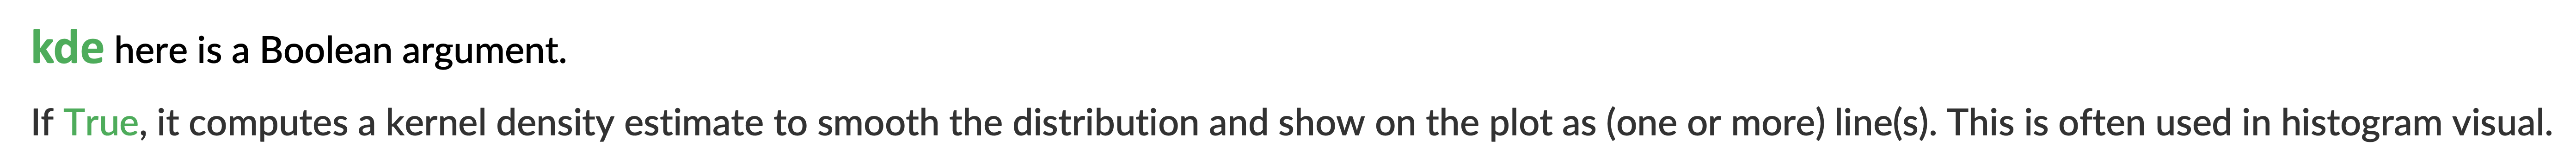

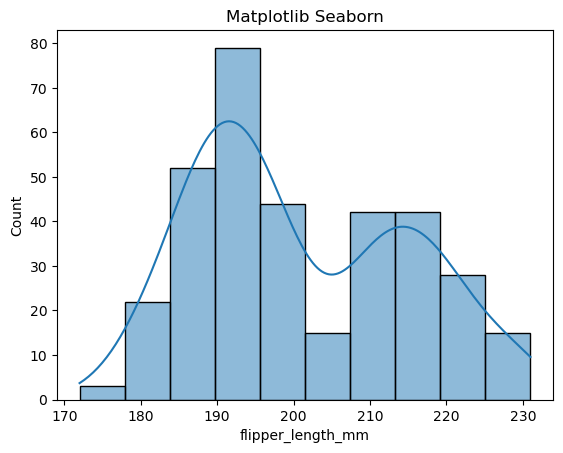

In [13]:
import matplotlib.pyplot as plt
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
plt.title('Matplotlib Seaborn')
plt.show()

# 2) sns.pairplot

In [21]:
import pandas as pd
df = pd.read_csv("gold_goldstock.csv")
df["Date"] = pd.to_datetime(df['Date'], dayfirst=True)  
df = df.set_index('Date')

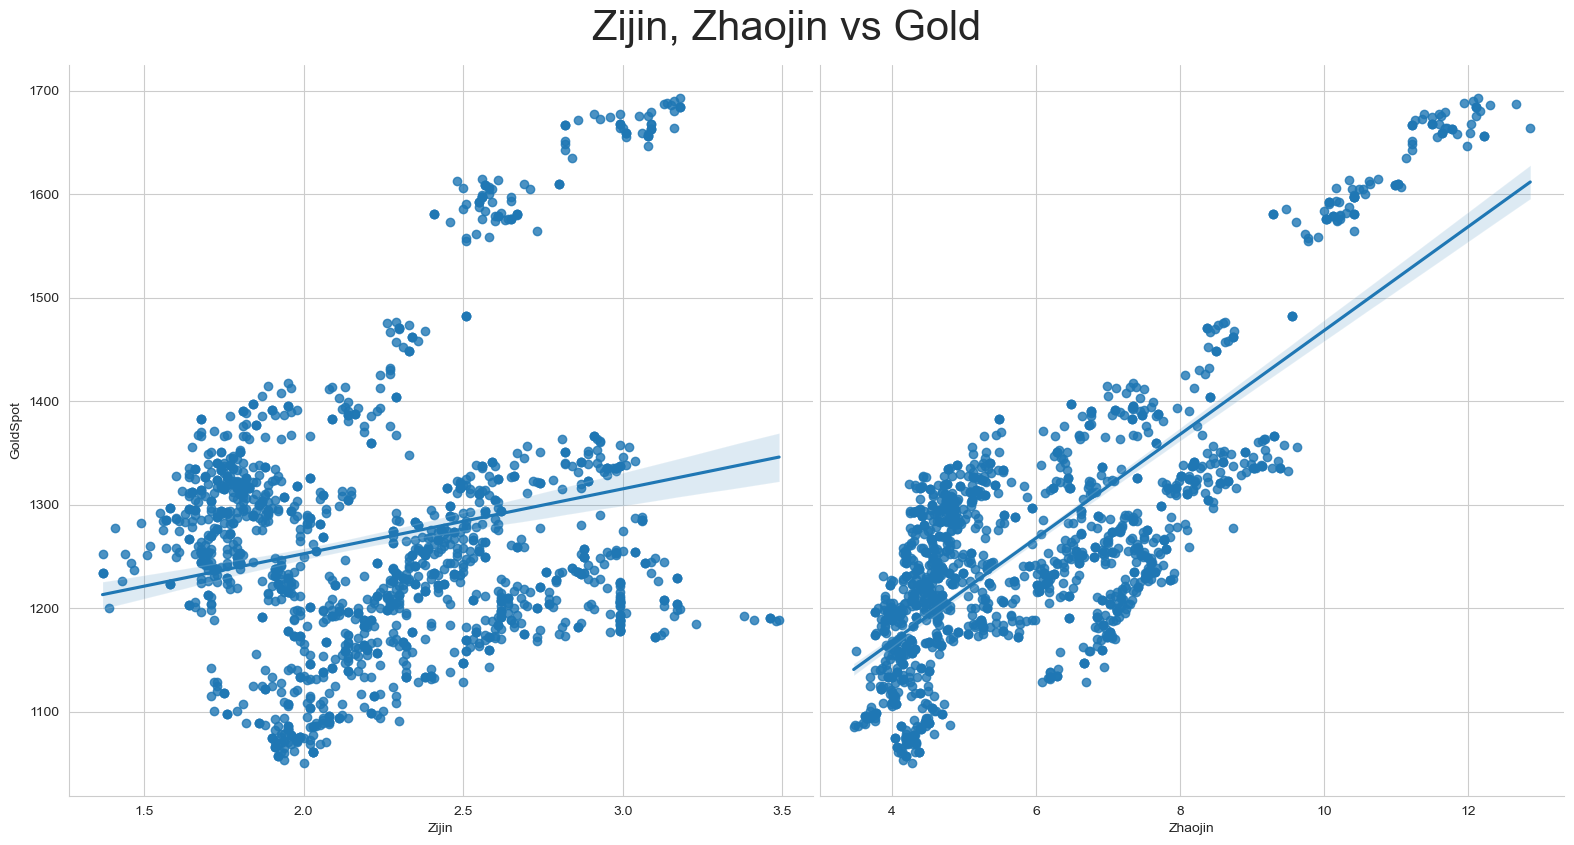

In [50]:
sns.set_style( {'axes.grid' : True})
import matplotlib.pyplot as plt
sns.pairplot(df, x_vars=["Zijin", "Zhaojin"], y_vars=["GoldSpot"],
             height=8, aspect=1, kind="reg" )
plt.suptitle('Zijin, Zhaojin vs Gold', fontsize=30, y=1.05)
plt.show()

# sns.relplot

In [51]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


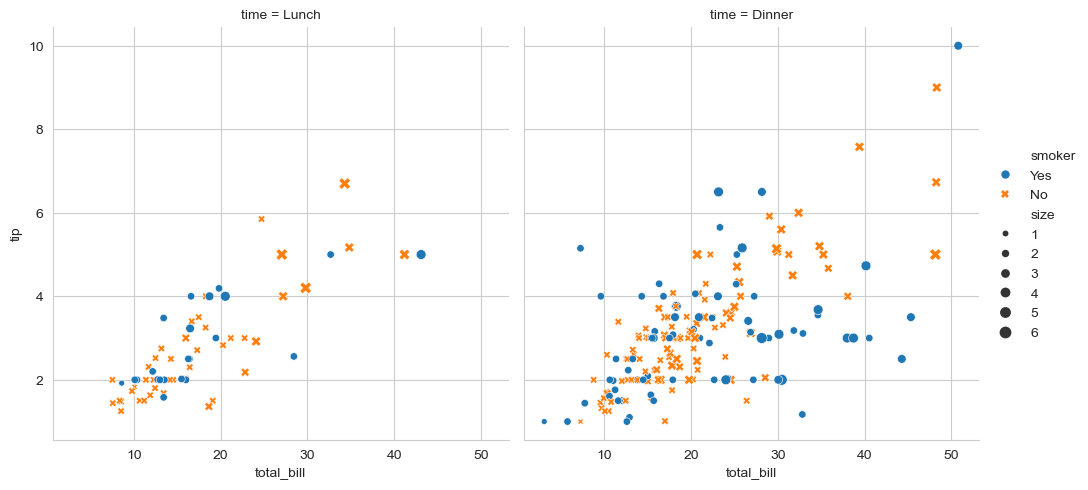

In [52]:
sns.relplot( data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size");

# More on sns.pairplot

In [13]:
penguins.sample(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,Female
307,Gentoo,Biscoe,51.3,14.2,218.0,5300.0,Male
40,Adelie,Dream,36.5,18.0,182.0,3150.0,Female
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,Male
189,Chinstrap,Dream,52.0,20.7,210.0,4800.0,Male
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,Male


In [14]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
# list of unique species
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

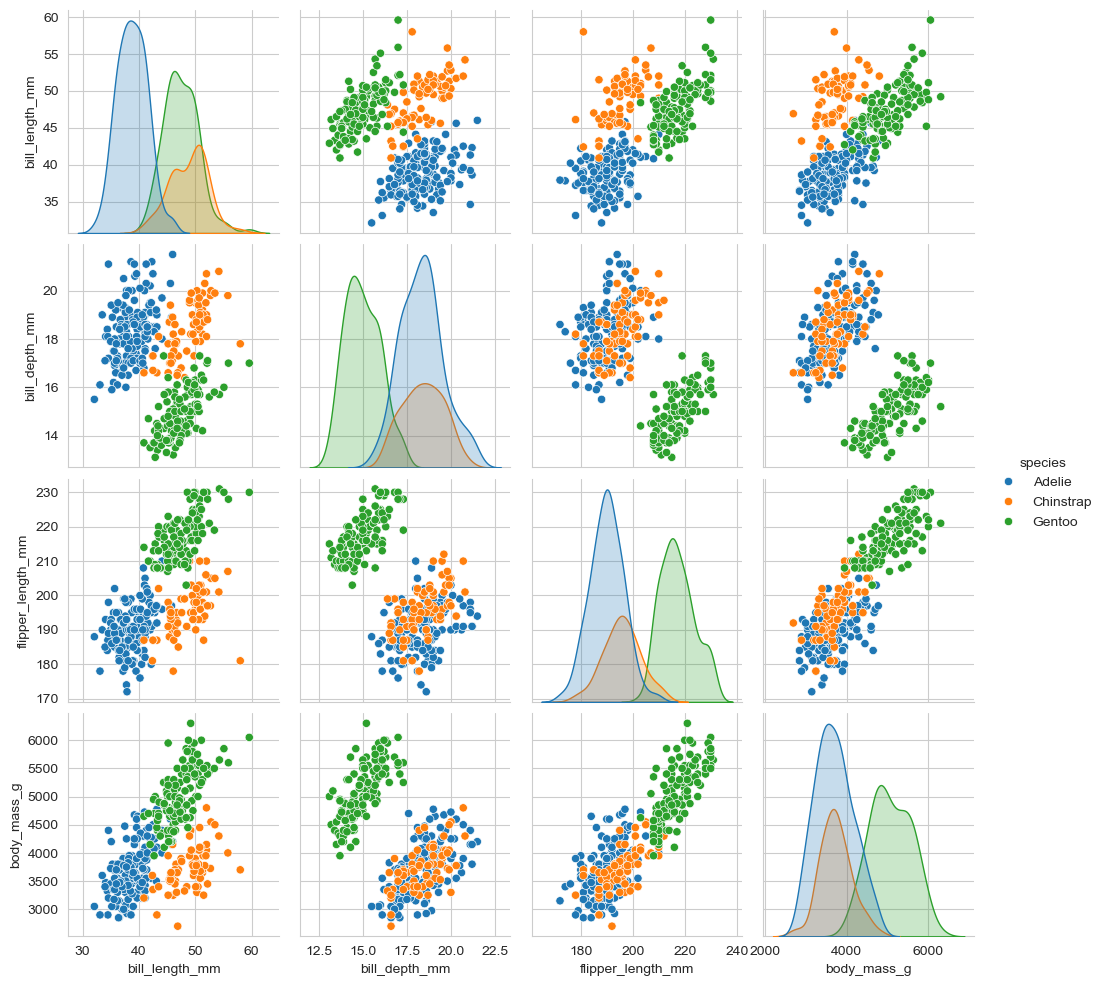

In [53]:
sns.pairplot(penguins, hue="species") # Classification

# sns.lineplot

In [17]:
df.sample(5)

,GoldSpot,Zijin,Zhaojin
Date,,,
2015-02-08,1234.04,2.29,4.79
2014-12-11,1227.72,2.09,3.99
2015-04-03,1206.91,2.62,4.28
2016-04-10,1240.69,2.35,5.90
2015-09-08,1121.55,1.98,3.99


<Axes: xlabel='Date'>

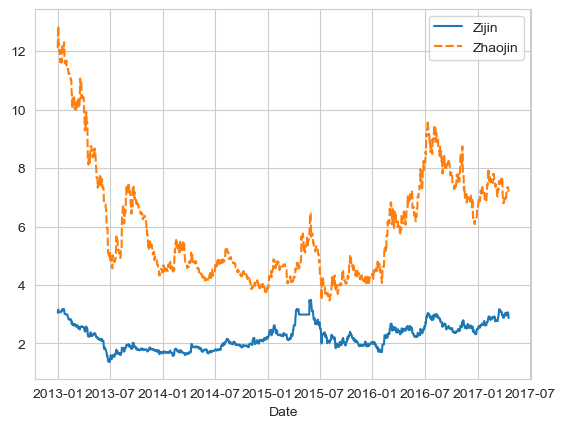

In [54]:
sns.lineplot(data=df[['Zijin', 'Zhaojin']])

# sns.heatmap

In [57]:
glue = sns.load_dataset("glue")
glue.sample(2)

,Model,Year,Encoder,Task,Score
50,RoBERTa,2019,Transformer,QNLI,95.4
49,T5,2019,Transformer,QNLI,96.9


In [58]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", 
                                      values="Score")
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

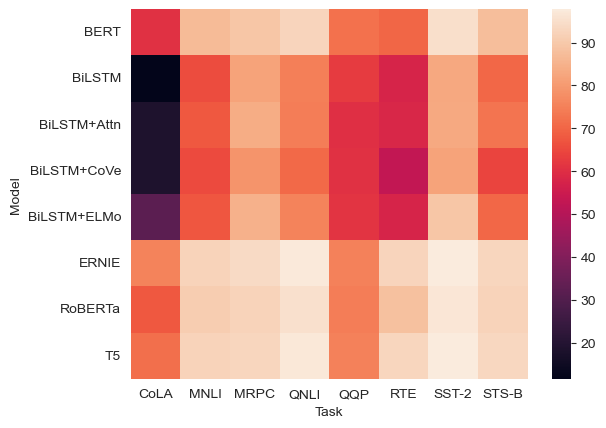

In [59]:
sns.heatmap(glue)

<Axes: xlabel='Task', ylabel='Model'>

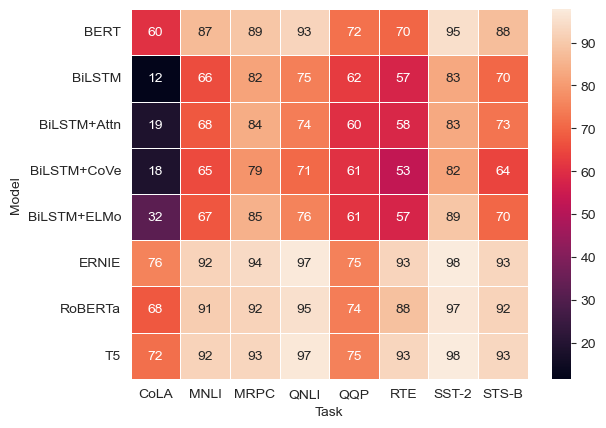

In [60]:
sns.heatmap(glue, annot=True, linewidths=.5)

In [62]:
import pandas as pd
import numpy as np

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
df_farmer = pd.DataFrame(data=harvest, index=vegetables, columns=farmers)

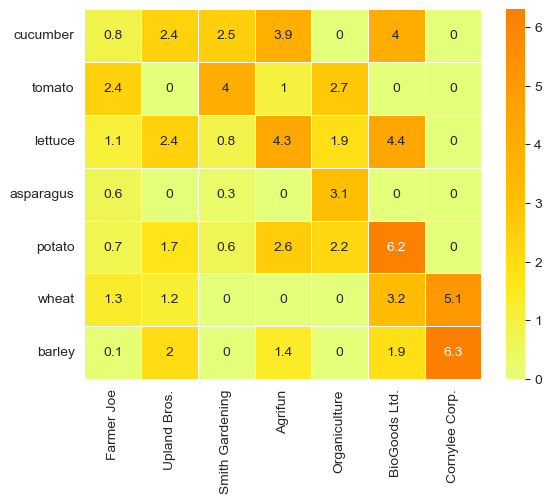

In [63]:
sns.heatmap(df_farmer, annot=True, linewidths=.5, cmap='Wistia');

# sns.scatterplot

In [25]:
tips = sns.load_dataset("tips")
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
118,12.43,1.80,Female,No,Thur,Lunch,2
164,17.51,3.00,Female,Yes,Sun,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
84,15.98,2.03,Male,No,Thur,Lunch,2


<Axes: >

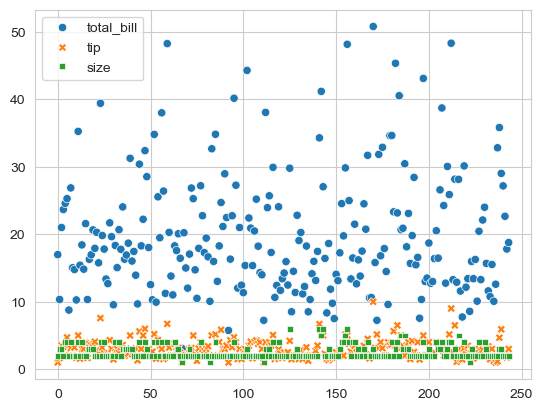

In [64]:
sns.scatterplot(data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

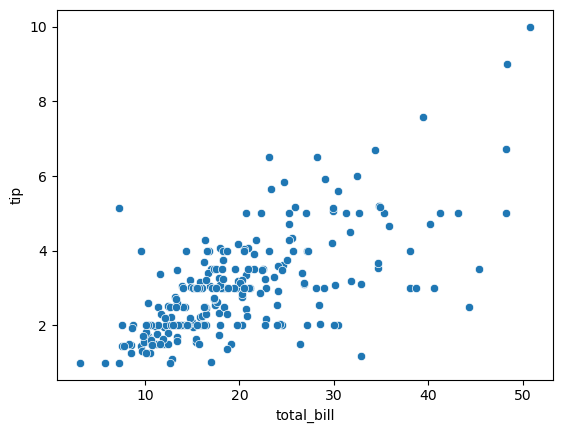

In [26]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

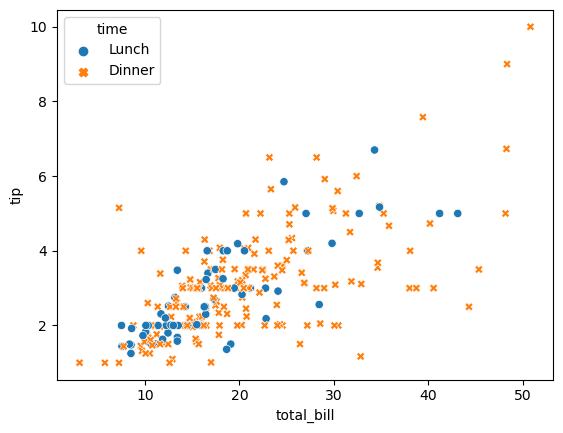

In [27]:
sns.scatterplot(data=tips, x="total_bill", 
        y="tip", hue="time", style="time")

# Estimate regression fits

# 1) sns.regplot

<Axes: xlabel='total_bill', ylabel='tip'>

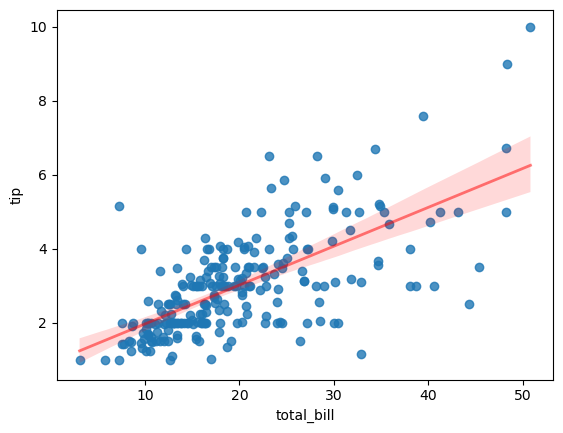

In [28]:
sns.regplot(data=tips, x="total_bill", y="tip", 
           line_kws={"color":"r","alpha":0.5,"lw":2})

# 2) sns.lmplot

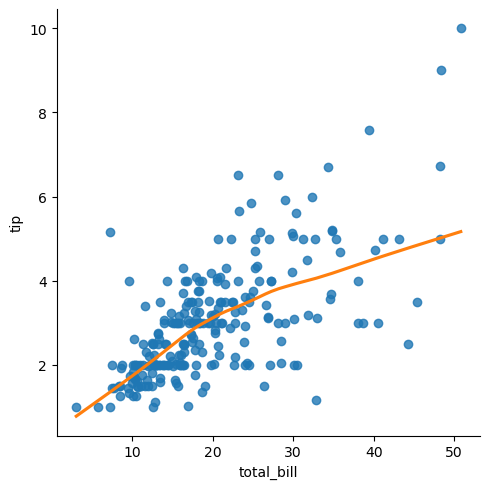

In [29]:
sns.lmplot(data=tips, x="total_bill", y="tip", 
           lowess=True, line_kws={"color": "C1"})

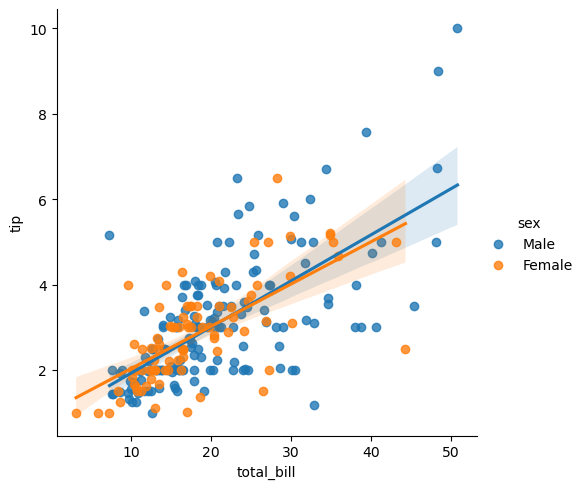

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

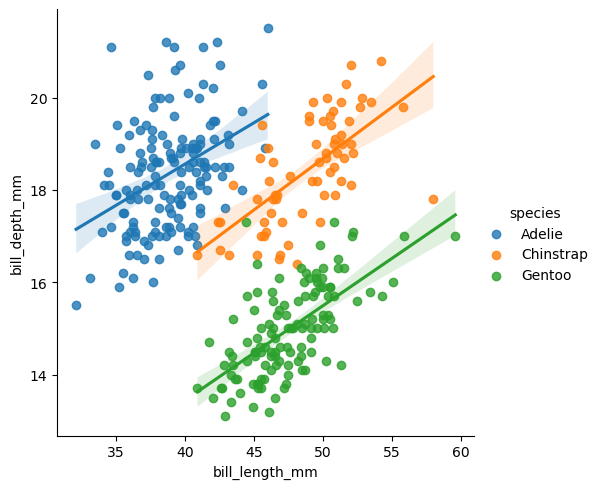

In [31]:
sns.lmplot(data=penguins, x="bill_length_mm", 
           y="bill_depth_mm", hue="species")

# Facet Plot

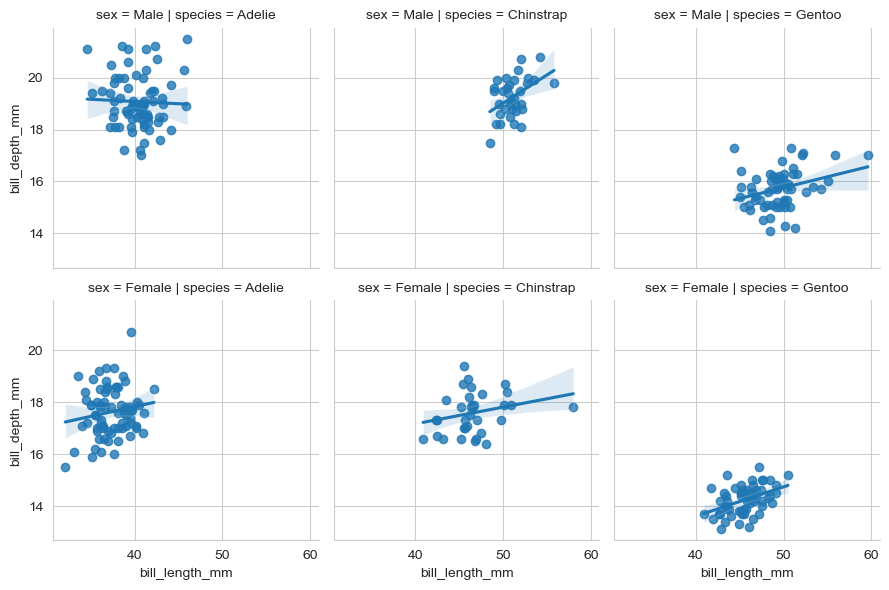

In [65]:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
    facet_kws=dict(sharex=True, sharey=True),
)

# Scatterplot with varying point sizes and hues

In [66]:
mpg = sns.load_dataset("mpg")
mpg.sample(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
142,26.0,4,79.0,67.0,1963,15.5,74,europe,volkswagen dasher


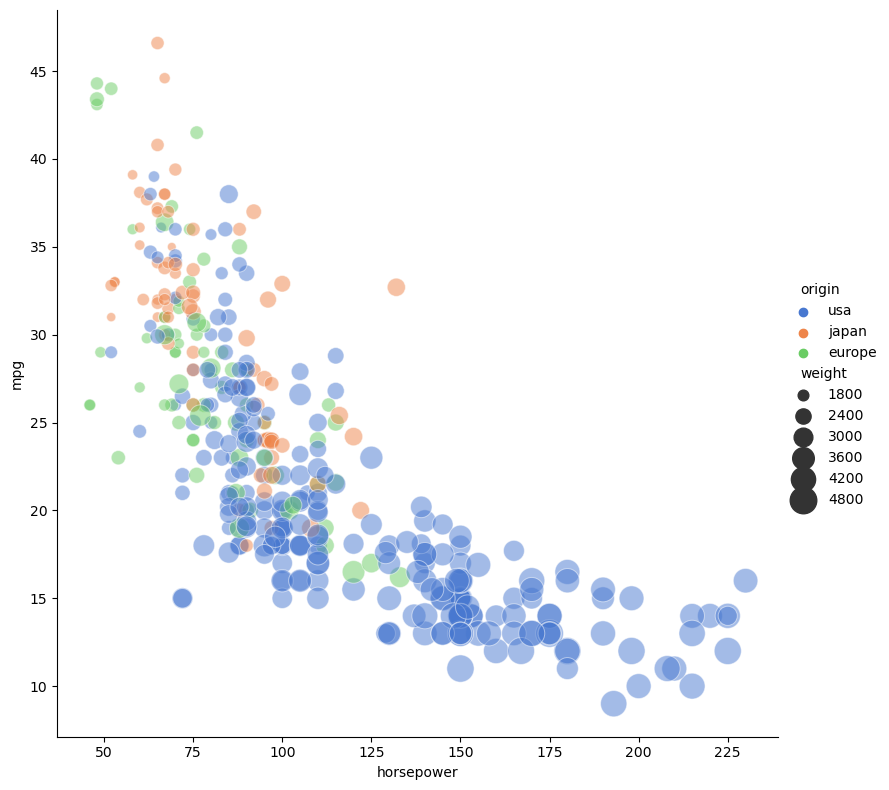

In [34]:
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted", # col="origin",
            height=8, data=mpg)

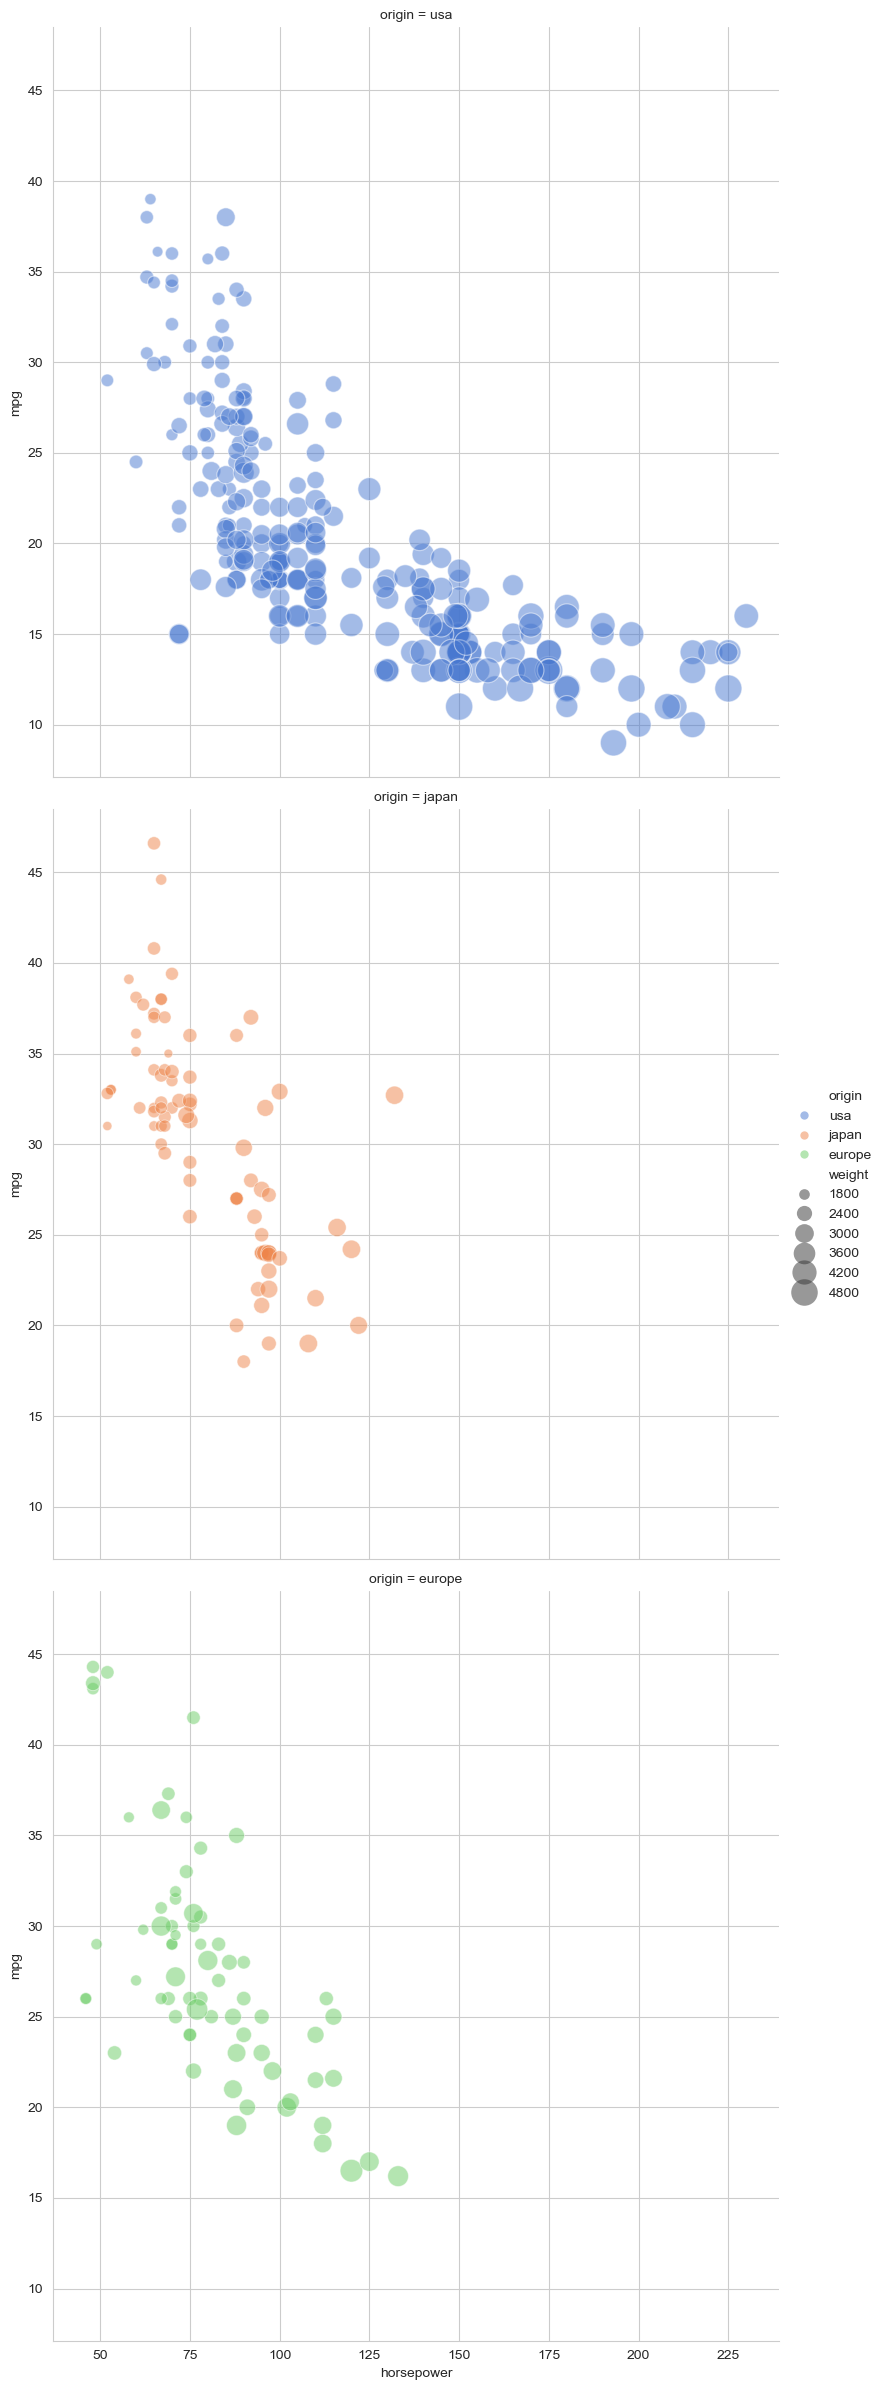

In [70]:
sns.relplot(x="horsepower", y="mpg", row="origin",
            hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=mpg)

# sns.boxplot

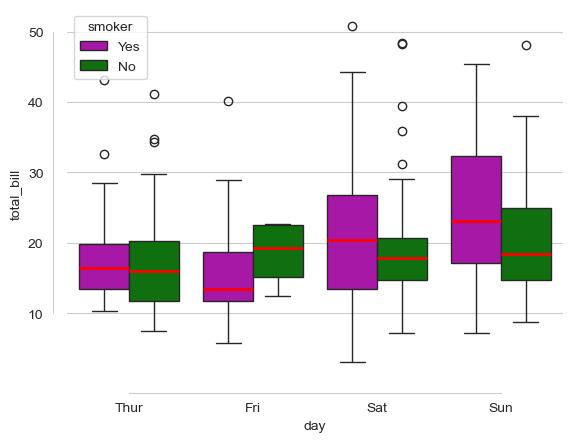

In [84]:
sns.boxplot(data=tips, x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            medianprops={"color": "r", "linewidth": 2})
sns.despine(offset=10, trim=True)

# sns.jointplot

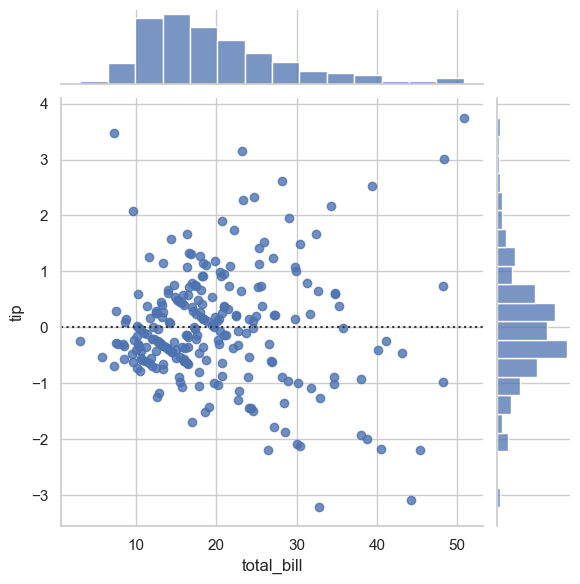

In [88]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind='resid') 
#  “scatter” | “kde” | “hist” | “hex” | “reg” | “resid”

# sns.JointGrid

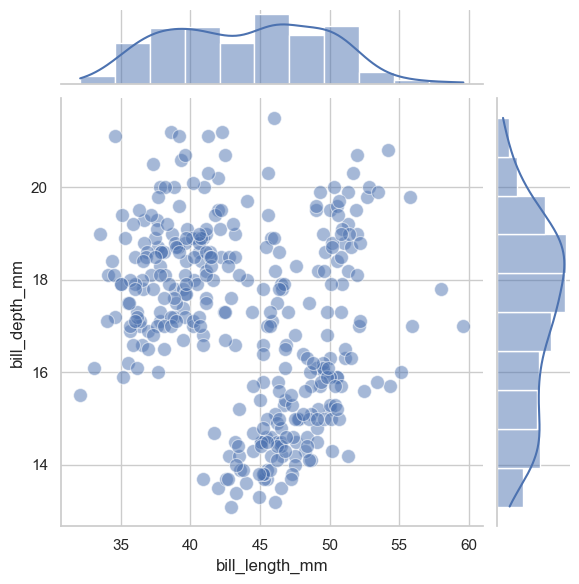

In [85]:
sns.set_theme(style="whitegrid")
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

#  sns.catplot & title, axis label, legend

In [92]:
penguins.groupby(['species','sex'])['body_mass_g'].agg(['mean','std'])

mean         std
species   sex                            
Adelie    Female  3368.835616  269.380102
          Male    4043.493151  346.811553
Chinstrap Female  3527.205882  285.333912
          Male    3938.970588  362.137550
Gentoo    Female  4679.741379  281.578294
          Male    5484.836066  313.158596

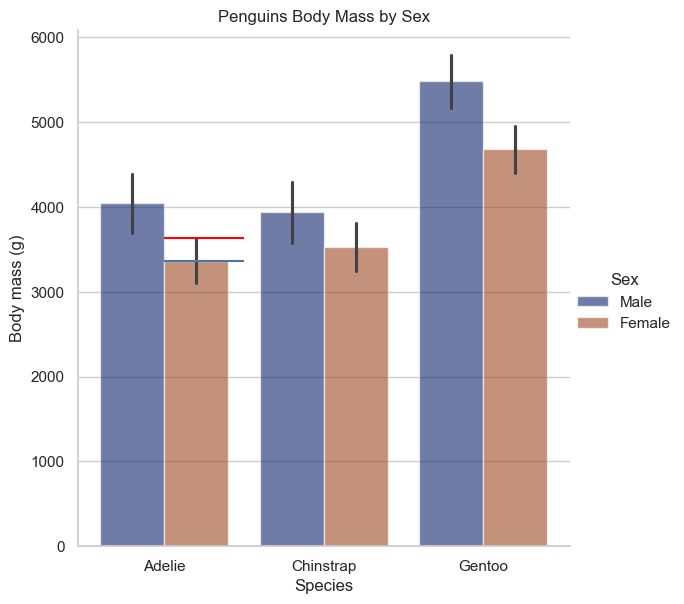

In [107]:
sns.set_theme(style="whitegrid")
sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title="Penguins Body Mass by Sex")\
.set_axis_labels("Species", "Body mass (g)")\
.legend.set_title("Sex")

plt.hlines(3368.835616, xmin=0, xmax=0.5)
plt.hlines(3368.835616+269.380102, xmin=0, xmax=.5, color='red')

# Colour Palettes 
<img src='https://seaborn.pydata.org/_images/color_palettes_22_0.svg'>

<Axes: >

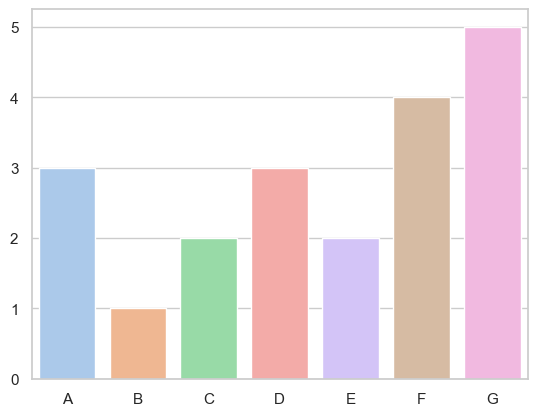

In [104]:
sns.set_style("whitegrid")
category=["A","B","C","D","E","F","G"]
sns.barplot(x=category, y=[3,1,2,3,2,4,5], palette="pastel", hue=category)

# sns.set_style
seaborn.set_style(style=None, rc=None)

Parameters:
styledict, or one of {darkgrid, whitegrid, dark, white, ticks}
A dictionary of parameters or the name of a preconfigured style.

rcdict, optional
Parameter mappings to override the values in the preset seaborn style dictionaries. This only updates parameters that are considered part of the style definition.

<Axes: >

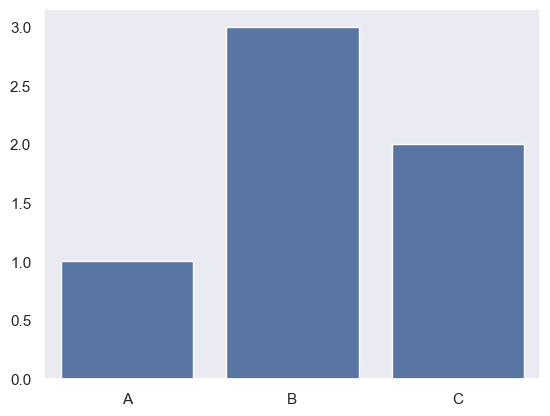

In [112]:
sns.set_style("dark")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

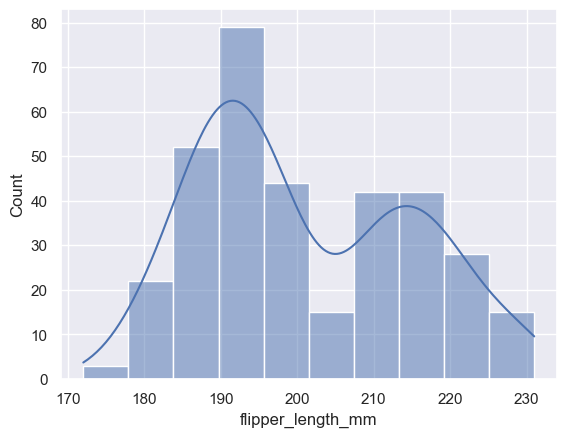

In [122]:
sns.set_style("darkgrid")
sns.set_context(rc={"grid.color": ".6", 
                           "grid.linestyle": ":",
                           'figure.figsize':(12,8)})
sns.histplot(data=penguins, x="flipper_length_mm", kde=True);